In [4]:
# 1. Data Ingestion
import pandas as pd
import numpy as np
from scipy.stats import zscore
from google.colab import files

uploaded = files.upload()

# Define file path
data_path = 'final_adjusted_crowd_dataset.csv'

# Load the dataset
df = pd.read_csv(data_path)
print(df.head())

Saving final_adjusted_crowd_dataset.csv to final_adjusted_crowd_dataset (2).csv
   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.282934      352 -0.036306 -0.008226 -0.023416      0  
1  0.108889      352  0.035776 -0.009448  0.009570      0  
2 -0.534985      352 -0.011871 -0.027774  0.003462      0  
3 -0.350396      352 -0.017980  0.002769 -0.005091      0  
4 -0.494085      352  0.011342  0.003380  0.006516      0  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  int64  
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.4+ MB
None

Missing Values Count:
Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0

<ipython-input-5-6295f74f428f>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


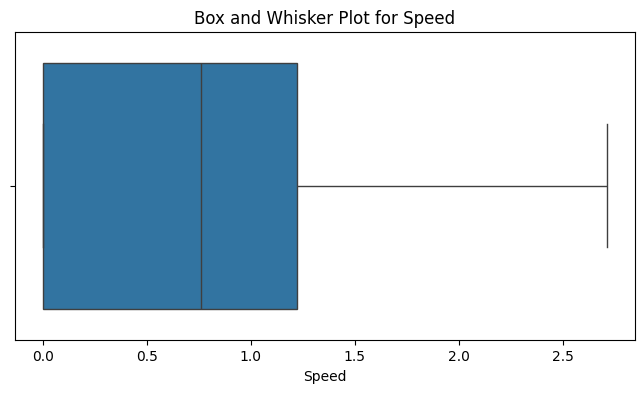

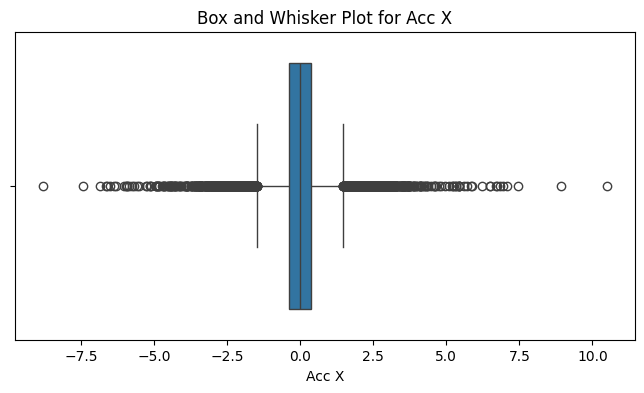

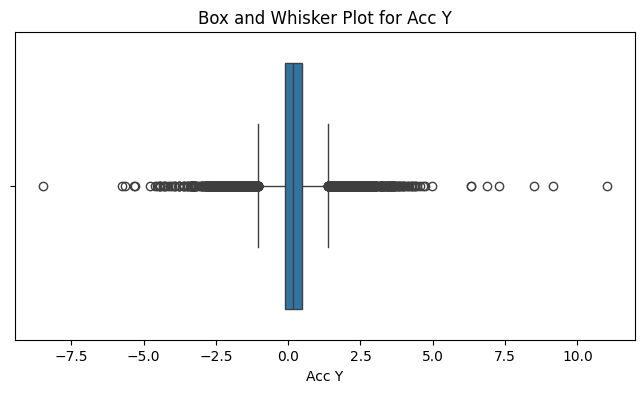

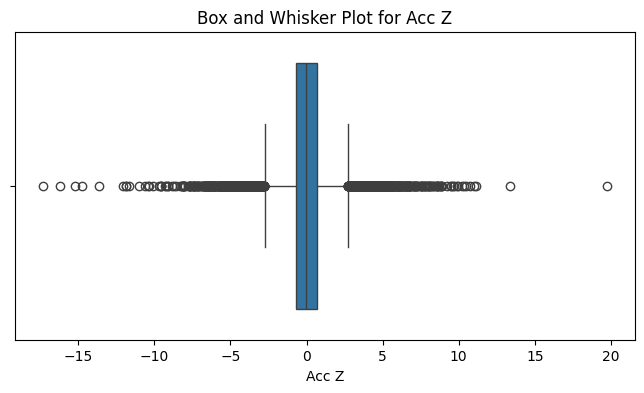

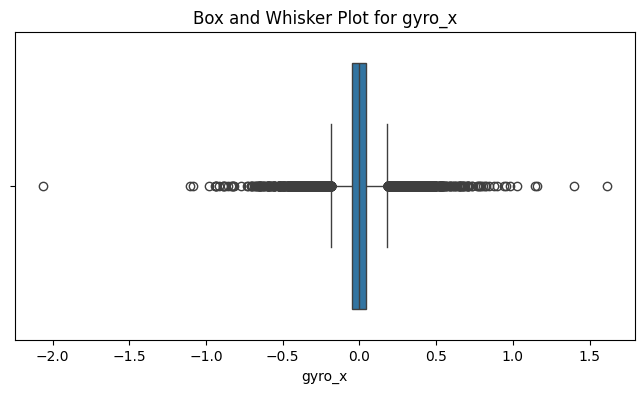

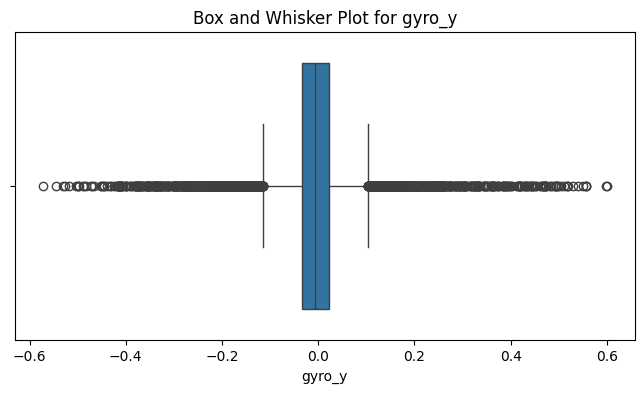

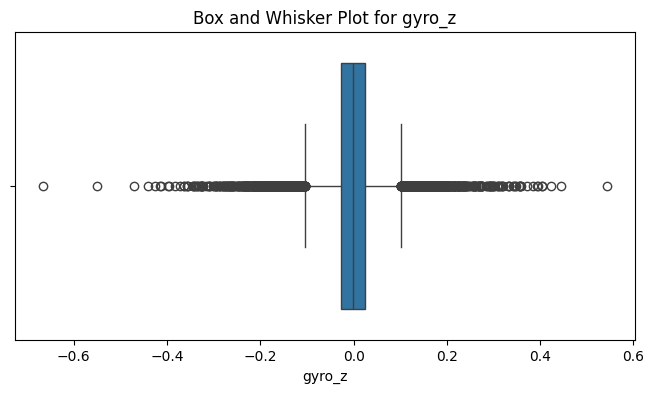

In [5]:
# 2. Exploratory Data Analysis (EDA) and Data Preprocessing
# Check for missing values and data types
print("Dataset Information:")
print(df.info())

print("\nMissing Values Count:")
print(df.isnull().sum())

# Drop or fill missing values as required (example: forward fill missing data)
df.fillna(method='ffill', inplace=True)

# Statistical summary
print("\nSummary Statistics:")
print(df.describe())

# Plotting distributions for key sensor data (Box and Whisker plot for outliers)
import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using separate Box and Whisker’s plot for each variable
# List of relevant columns (based on the dataset structure)
sensor_columns = ['Speed', 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Plot separate Box and Whisker plots for each column
for col in sensor_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box and Whisker Plot for {col}")
    plt.show()


# **Tasks done by me : -**

**Task1 (16/10/24) - Feature Engineering and Data Augmentation**


In [6]:
#new features (e.g., speed changes, sudden stops, direction changes).
#Calculate Speed Change & Direction Change
# Speed change (difference between consecutive rows)
df['Speed_Change'] = df['Speed'].diff()

# Direction change (Heading difference)
df['Direction_Change'] = df['Heading'].diff().fillna(0)

# Convert Time column to a proper datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H-%M-%S')
df['Time_Change'] = (df['Time'].diff().dt.total_seconds()).fillna(0)
# Acceleration Rate and Braking Intensity
df['Acceleration_Rate'] = df['Speed_Change'] / df['Time_Change']
df['Braking_Intensity'] = df['Acceleration_Rate'].apply(lambda x: x if x < 0 else 0)


#Jerk (Rate of Change of Acceleration)
df['Acc_Magnitude'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)
df['Jerk'] = df['Acc_Magnitude'].diff() / df['Time_Change']

# Cumulative Distance and Speed Variance
df['Cumulative_Distance'] = df['Distance'].cumsum()
df['Speed_Variance'] = df['Speed'].rolling(window=5).var()


**task done by teamate but necessary for code exection**

time-based features like rolling averages, moving variance for accelerometer and gyroscope data.

In [7]:
# Rolling average of Acc X over a window of 5 readings
df['Rolling_Mean_AccX'] = df['Acc X'].rolling(window=5).mean()

# Moving variance of gyro_x
df['Variance_GyroX'] = df['gyro_x'].rolling(window=5).var()


Engineer feature

In [8]:
# Total Acceleration from X, Y, Z components
df['Total_Acc'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)


Feature Importance (Correlation)

Save the Updated Dataset

In [9]:
# Save the updated dataset
df.to_csv('augmented_dataset.csv', index=False)

# **TASK 2(17/10/24) Z-Score-Based Outlier Detection:**


In [10]:
# Load the dataset
aug_df = pd.read_csv('augmented_dataset.csv')
print(aug_df.head())

   Longitude   Latitude  Speed  Distance                 Time     Acc X  \
0  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12  0.046402   
1  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:12 -0.136978   
2  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.045355   
3  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13  0.242089   
4  73.822661  18.501627    0.0       0.0  1900-01-01 18:45:13 -0.230234   

      Acc Y     Acc Z  Heading    gyro_x  ...  Time_Change  Acceleration_Rate  \
0 -0.137178 -0.282934      352 -0.036306  ...          0.0                NaN   
1  0.365242  0.108889      352  0.035776  ...          0.0                NaN   
2 -0.103340 -0.534985      352 -0.011871  ...          1.0                0.0   
3  0.072761 -0.350396      352 -0.017980  ...          0.0                NaN   
4  0.011765 -0.494085      352  0.011342  ...          0.0                NaN   

   Braking_Intensity  Acc_Magnitude      Jerk  Cumulative_Dist

Calculate Z-scores for the dataset and flag anomalies.

In [11]:
# Check for NaN values in the relevant columns
print(aug_df[['Speed', 'Acceleration_Rate', 'Jerk']].isna().sum())


Speed                    0
Acceleration_Rate    11799
Jerk                     9
dtype: int64


In [12]:
#Handle NaN Values for Acceleration_Rate
# Fill NaN values with 0 for Acceleration_Rate
aug_df['Acceleration_Rate'] = aug_df['Acceleration_Rate'].fillna(0)
aug_df = aug_df.dropna(subset=['Acceleration_Rate'])



In [13]:
#Check Again
print(aug_df[['Speed', 'Acceleration_Rate', 'Jerk']].isna().sum())


Speed                0
Acceleration_Rate    0
Jerk                 9
dtype: int64


In [14]:
aug_df['Jerk'] = aug_df['Jerk'].fillna(0)

In [15]:
#Check Again
print(aug_df[['Speed', 'Acceleration_Rate', 'Jerk']].isna().sum())


Speed                0
Acceleration_Rate    0
Jerk                 0
dtype: int64


**Implement Z-score-based outlier detection.**

In [16]:
# Calculate Z-scores for the relevant columns
z_scores = aug_df[['Speed', 'Acceleration_Rate', 'Jerk']].apply(zscore)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


**task done by teamate but necessary for code exection**

Flag anomalies where Z-score > 3 or < -3





In [17]:
# Flag anomalies where Z-score > 3 or < -3
aug_df['Anomaly'] = (np.abs(z_scores) > 3).any(axis=1).astype(int)


In [18]:
# Save the updated dataset
aug_df.to_csv('augmented_dataset.csv', index=False)

# Display anomalies if needed
anomalies = aug_df[aug_df['Anomaly'] == 1]
print(anomalies)

Empty DataFrame
Columns: [Longitude, Latitude, Speed, Distance, Time, Acc X, Acc Y, Acc Z, Heading, gyro_x, gyro_y, gyro_z, label, Speed_Change, Direction_Change, Time_Change, Acceleration_Rate, Braking_Intensity, Acc_Magnitude, Jerk, Cumulative_Distance, Speed_Variance, Rolling_Mean_AccX, Variance_GyroX, Total_Acc, Anomaly]
Index: []

[0 rows x 26 columns]


**Task 3  (18/10/24)- Compare Z-score and IQR results**

Compare Z-score and IQR results

Joint Comparison of Z-score and IQR Anomalies:
         Acc X    Acc Y    Acc Z    Speed   gyro_x   gyro_y   gyro_z
0      No | No  No | No  No | No  No | No  No | No  No | No  No | No
1      No | No  No | No  No | No  No | No  No | No  No | No  No | No
2      No | No  No | No  No | No  No | No  No | No  No | No  No | No
3      No | No  No | No  No | No  No | No  No | No  No | No  No | No
4      No | No  No | No  No | No  No | No  No | No  No | No  No | No
...        ...      ...      ...      ...      ...      ...      ...
14244  No | No  No | No  No | No  No | No  No | No  No | No  No | No
14245  No | No  No | No  No | No  No | No  No | No  No | No  No | No
14246  No | No  No | No  No | No  No | No  No | No  No | No  No | No
14247  No | No  No | No  No | No  No | No  No | No  No | No  No | No
14248  No | No  No | No  No | No  No | No  No | No  No | No  No | No

[14249 rows x 7 columns]


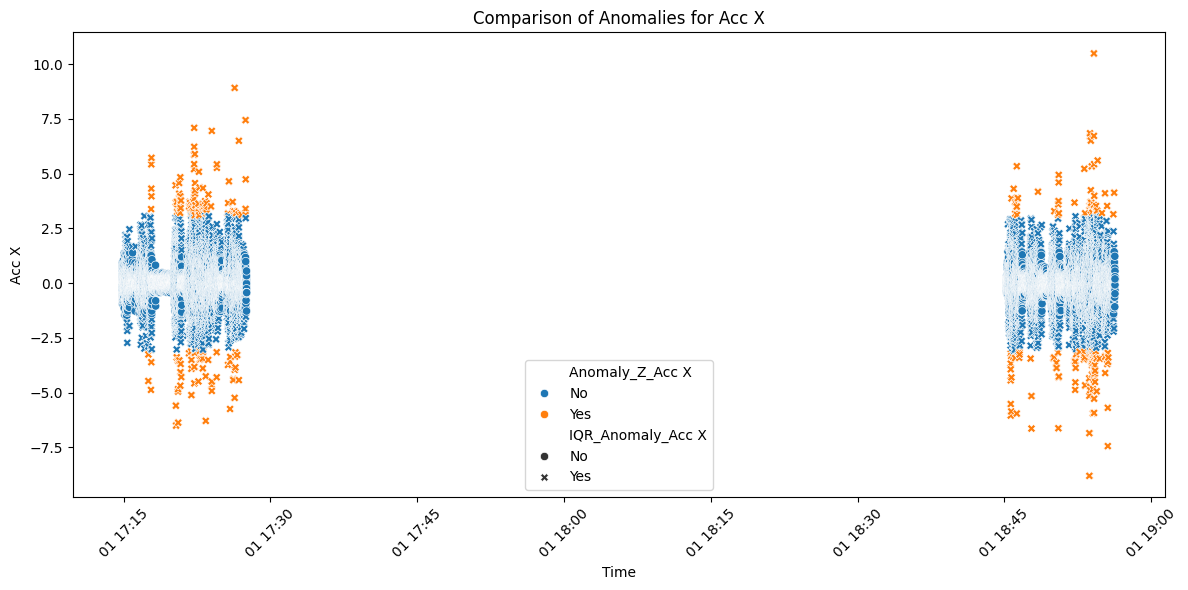

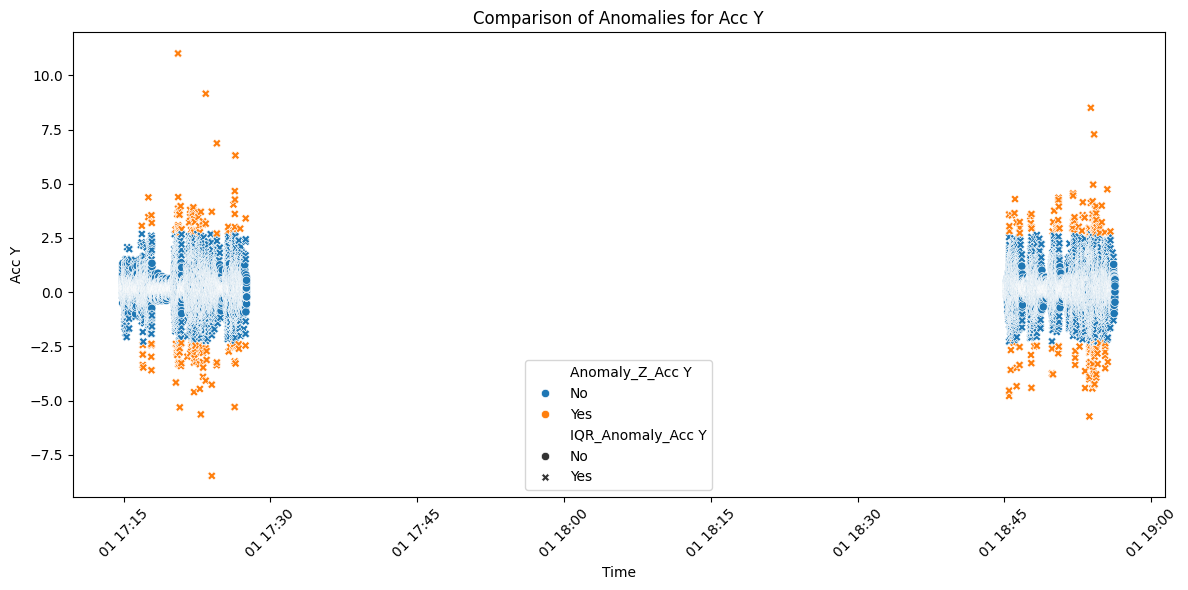

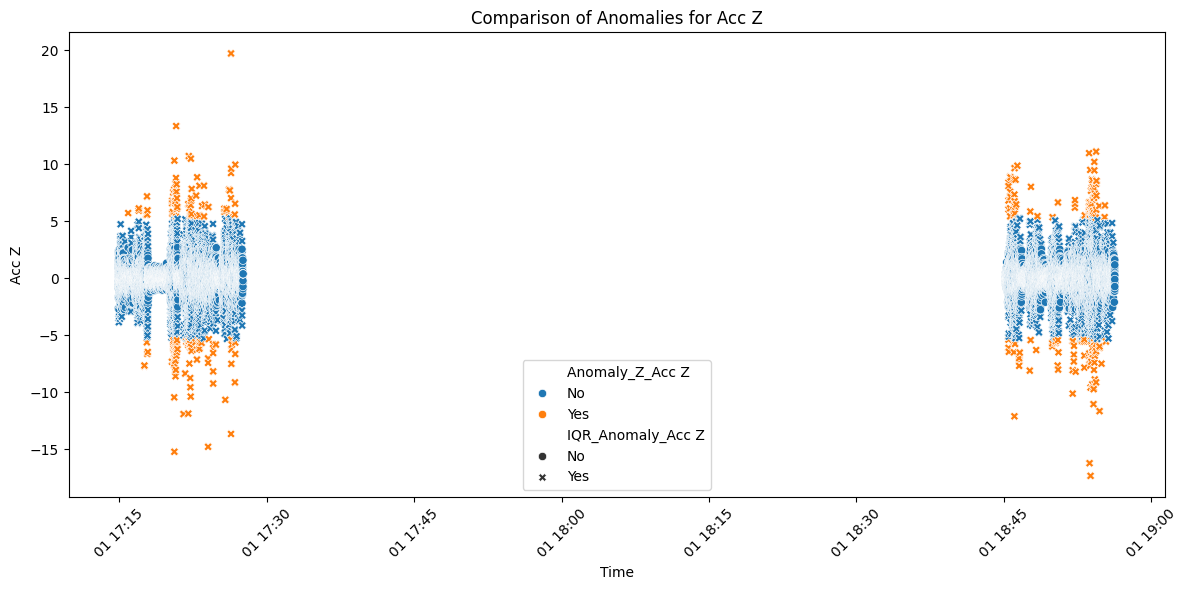

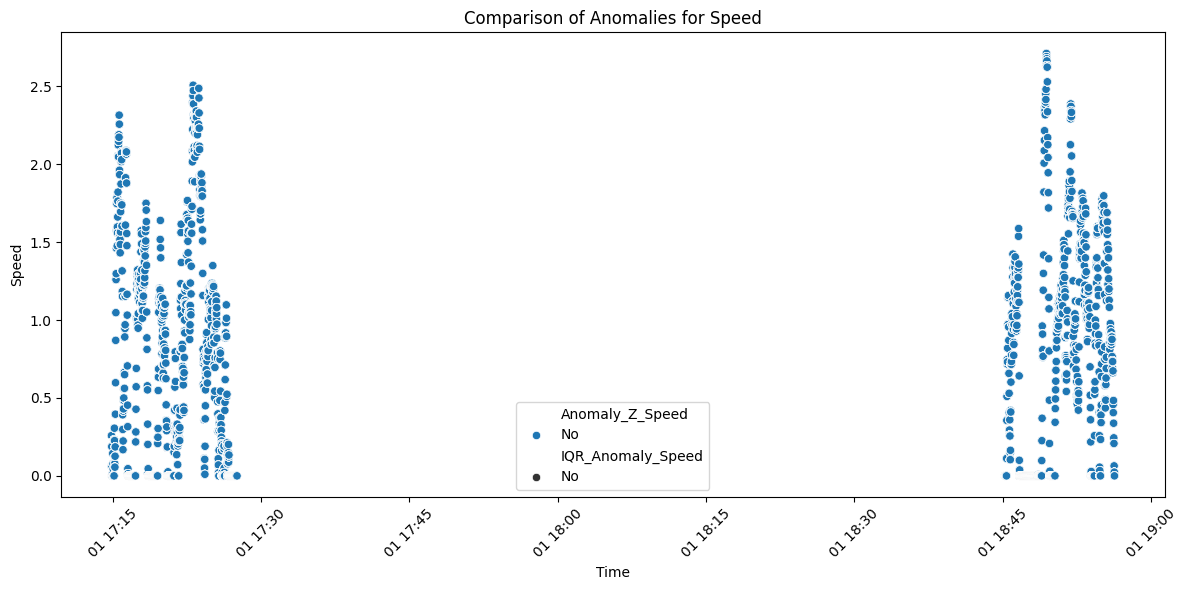

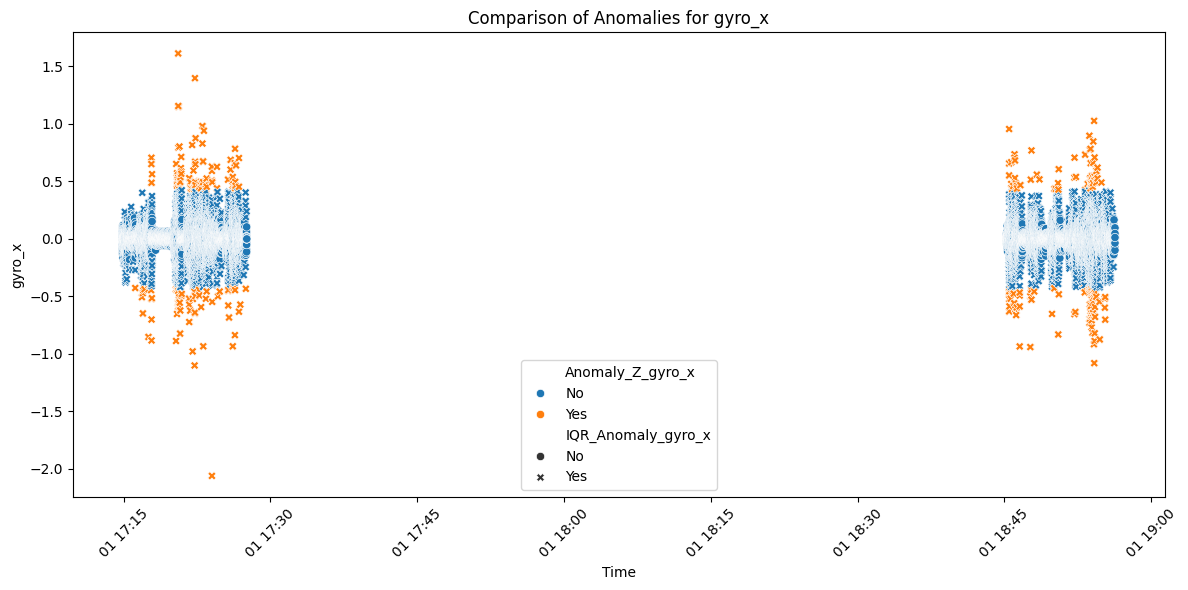

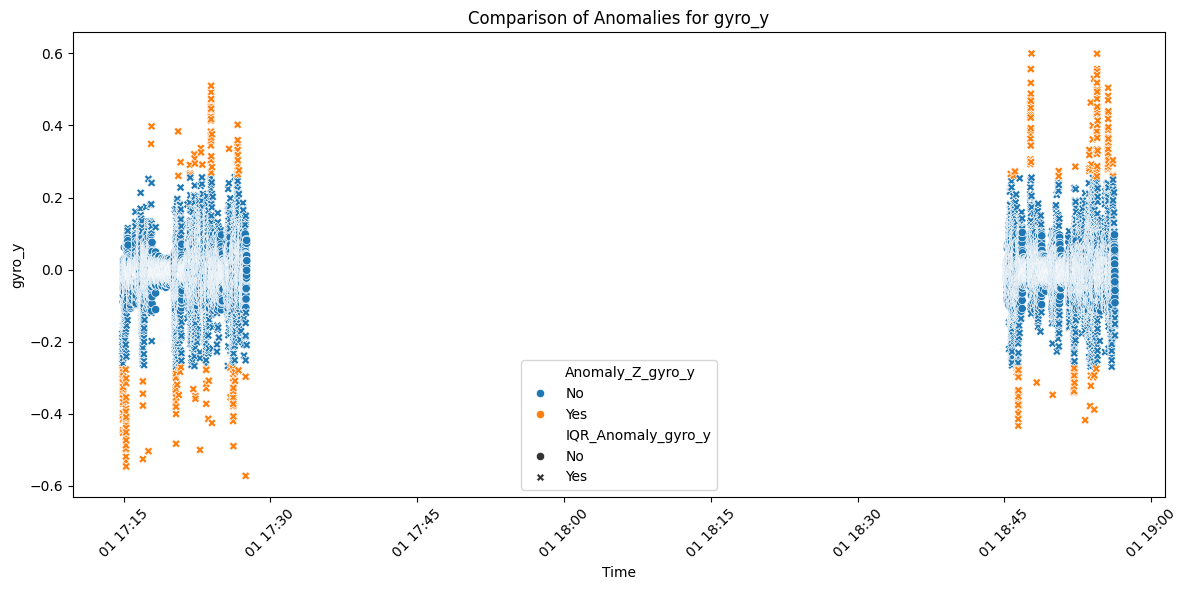

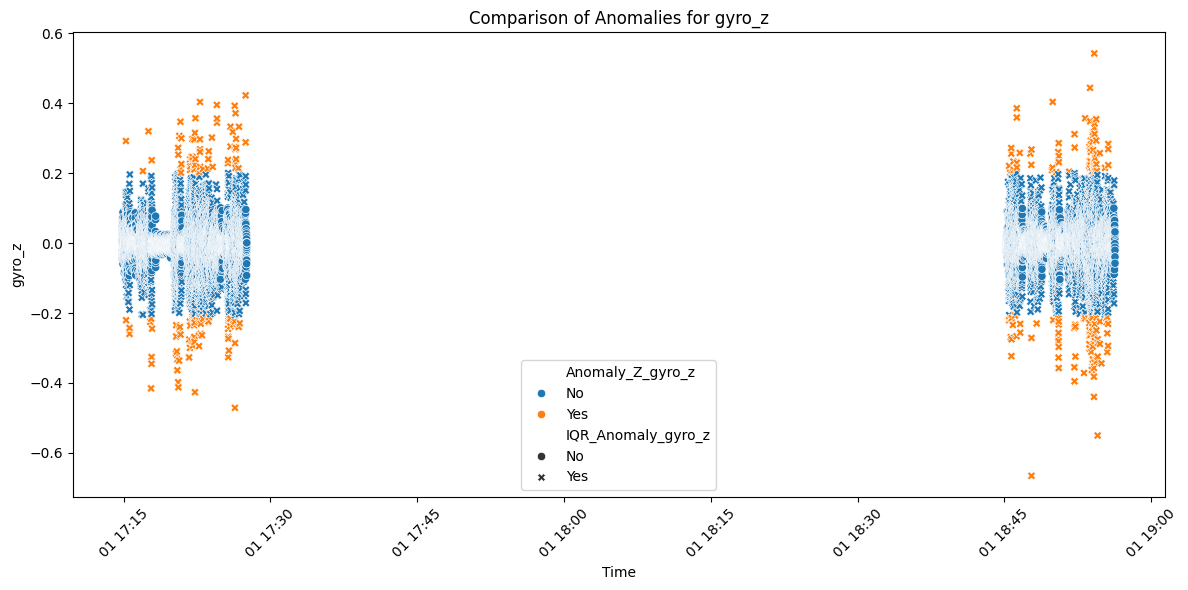

In [19]:
# Define a function for Z-score calculation and anomaly detection
def calculate_z_scores(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    df[f'Z-Score_{column_name}'] = z_scores
    df[f'Anomaly_Z_{column_name}'] = z_scores.apply(lambda x: 'Yes' if abs(x) > 3 else 'No')

# Define a function for IQR calculation and anomaly detection
def calculate_iqr_anomalies(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[f'IQR_Anomaly_{column_name}'] = df[column_name].apply(
        lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No'
    )

# List of parameters for which to calculate anomalies
parameters = ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'gyro_x', 'gyro_y', 'gyro_z']

# Calculate anomalies using Z-scores
for param in parameters:
    calculate_z_scores(df, param)

# Calculate anomalies using IQR
for param in parameters:
    calculate_iqr_anomalies(df, param)

# Compare results
comparison_results = {}
for param in parameters:
    z_anomalies = df[f'Anomaly_Z_{param}']
    iqr_anomalies = df[f'IQR_Anomaly_{param}']

    # Create a combined comparison column
    comparison_results[param] = pd.Series(z_anomalies + " | " + iqr_anomalies)

# Create a summary DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Display the comparison DataFrame
print("Joint Comparison of Z-score and IQR Anomalies:")
print(comparison_df)

# Optional: Visualize results if needed
for param in parameters:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Time', y=param, hue=f'Anomaly_Z_{param}', style=f'IQR_Anomaly_{param}', data=df)
    plt.title(f'Comparison of Anomalies for {param}')
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


Also,I have prepared the report on the new features created

## **REPORT**

# **Feature Engineering and Data Augmentation Report**

---



**Introduction**

The dataset used for anomaly detection in crowds via smartphone data was enhanced through feature engineering and data augmentation techniques. This report documents the newly created features, their purposes, and the results from implementing statistical analysis to explore their relationships.

---



**1.	New Features Created**

Several new features were engineered based on the existing accelerometer, gyroscope, and location data. These features help to capture more detailed information about movement, behavior, and anomalies in the dataset. Below is a detailed description of each feature:

1.1	Speed Change

•	Purpose: Captures the change in speed between consecutive data points to detect acceleration and deceleration patterns.

•	Formula:

`df['Speed_Change'] = df['Speed'].diff()`

1.2	Direction Change

•	Purpose: Identifies abrupt changes in the movement direction by calculating the difference in heading between consecutive points.

•	Formula:


`df['Direction_Change'] = df['Heading'].diff().fillna(0)`

1.3	Time Change

•	Purpose: Computes the time difference between consecutive data points for time- sensitive feature engineering (e.g., rate of change in speed or acceleration).

•	Formula:

`df['Time'] = pd.to_datetime(df['Time'], format='%H-%M-%S')`

 `df['Time_Change'] = df['Time'].diff().dt.total_seconds().fillna(0)`

1.4	Acceleration Rate

•	Purpose: Measures the rate at which speed changes, helping to identify acceleration and braking events.

•	Formula:


`df['Acceleration_Rate'] = df['Speed_Change'] / df['Time_Change']`

1.5	Braking Intensity

•	Purpose: Determines the intensity of braking by focusing on negative values of acceleration rate (i.e., deceleration).

•	Formula:

`df['Braking_Intensity'] = df['Acceleration_Rate'].apply(lambda x: x if x < 0 else 0)`

1.6	Jerk

•	Purpose: Calculates the rate of change of acceleration (jerk), which can be indicative of sudden movements or stops.

•	Formula:


`df['Jerk'] = df['Acc_Magnitude'].diff() / df['Time_Change']`

1.7	Cumulative Distance

•	Purpose: Keeps a running total of the distance covered over time, aiding in trajectory analysis.

•	Formula:


`df['Cumulative_Distance'] = df['Distance'].cumsum()`

1.8	Speed Variance

•	Purpose: Measures the variance in speed over a rolling window, providing insights into the steadiness of the movement.

•	Formula:

`df['Speed_Variance'] = df['Speed'].rolling(window=5).var()`

---



**2.	Time-Based Features**

2.1	Rolling Mean of Accelerometer X (Acc X)

•	Purpose: Computes the rolling average of the accelerometer's X-axis data over a 5- sample window, which helps smoothen out fluctuations and reveal underlying trends.
•	Formula:


`df['Rolling_Mean_AccX'] = df['Acc X'].rolling(window=5).mean()`

2.2	Moving Variance of Gyroscope X (Gyro X)

•	Purpose: Calculates the variance of the gyroscope's X-axis over a 5-sample window to detect variations in rotational motion.

•	Formula:

`df['Variance_GyroX'] = df['gyro_x'].rolling(window=5).var()`

---


**3.	Engineered Feature**
---
3.1	Total Acceleration

•	Purpose: Computes the total magnitude of acceleration from the X, Y, and Z components of the accelerometer data, providing a comprehensive measure of motion intensity.

•	Formula:

`df['Total_Acc'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)`

---

**4.	Feature Importance Analysis**

A correlation matrix was computed to identify the relationships between the various features. Significant observations include:

•	Speed is positively correlated with Heading and Cumulative Distance.
•	Total Acceleration is strongly correlated with Acceleration Magnitude, suggesting that these features provide similar information regarding motion intensity.
•	Jerk is moderately correlated with Acceleration Magnitude, which is expected as it measures the rate of change in acceleration.
•	Features like Braking Intensity and Speed Variance exhibit low correlations with most other features, indicating their unique contribution to the dataset.

---

**5.	Results Summary**

The new features provide deeper insights into the behavior of the data and allow for more advanced analysis of movement, including sudden stops, changes in direction, and speed variations. The combination of time-based rolling statistics and engineered features will

improve anomaly detection, leading to better performance in security and crowd management applications.

---

**6.	Conclusion**

The feature engineering and data augmentation efforts have enhanced the dataset by creating more informative variables that better represent the underlying dynamics of movement. These features will be useful for training machine learning models for real-time anomaly detection and understanding crowd behavior in various environments.

---

**7.	Saved Dataset**

The updated dataset with all new features has been saved as augmented_dataset.csv.

---


# **Task 4 (21/10/24)**
**Z-Score-Based Outlier Detection**

Re-evaluate the Z-score threshold values for each sensor, test different thresholds (e.g., Z-scores of 2, 2.5, 3) and compare the results.

In [20]:
# Modify Z-score function to accept dynamic threshold
def calculate_z_scores(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    df[f'Z-Score_{column_name}'] = z_scores
    df[f'Anomaly_Z_{column_name}_T{threshold}'] = z_scores.apply(lambda x: 'Yes' if abs(x) > threshold else 'No')

# List of thresholds to test
thresholds = [2, 2.5, 3]

# Run Z-score anomaly detection for each threshold
for threshold in thresholds:
    for param in parameters:
        calculate_z_scores(df, param, threshold)

# Now, compare the results
for param in parameters:
    print(f"Anomaly Comparison for {param} across thresholds:")
    for threshold in thresholds:
        anomaly_col = f'Anomaly_Z_{param}_T{threshold}'
        print(f"Threshold {threshold}: {df[anomaly_col].value_counts()}")


Anomaly Comparison for Acc X across thresholds:
Threshold 2: Anomaly_Z_Acc X_T2
No     13427
Yes      822
Name: count, dtype: int64
Threshold 2.5: Anomaly_Z_Acc X_T2.5
No     13774
Yes      475
Name: count, dtype: int64
Threshold 3: Anomaly_Z_Acc X_T3
No     13975
Yes      274
Name: count, dtype: int64
Anomaly Comparison for Acc Y across thresholds:
Threshold 2: Anomaly_Z_Acc Y_T2
No     13411
Yes      838
Name: count, dtype: int64
Threshold 2.5: Anomaly_Z_Acc Y_T2.5
No     13778
Yes      471
Name: count, dtype: int64
Threshold 3: Anomaly_Z_Acc Y_T3
No     13969
Yes      280
Name: count, dtype: int64
Anomaly Comparison for Acc Z across thresholds:
Threshold 2: Anomaly_Z_Acc Z_T2
No     13434
Yes      815
Name: count, dtype: int64
Threshold 2.5: Anomaly_Z_Acc Z_T2.5
No     13760
Yes      489
Name: count, dtype: int64
Threshold 3: Anomaly_Z_Acc Z_T3
No     13956
Yes      293
Name: count, dtype: int64
Anomaly Comparison for Speed across thresholds:
Threshold 2: Anomaly_Z_Speed_T2
No     1

Experiment with standardization techniques, such as Min-Max scaling, to see how they impact Z-score anomaly detection.

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Define a function for Min-Max scaling
def min_max_scale(df, column_name):
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(df[[column_name]])
    df[f'Scaled_{column_name}'] = scaled_values

# Step 2: Modify the Z-score function to accept scaled data
def calculate_scaled_z_scores(df, column_name, threshold=3):
    mean = df[f'Scaled_{column_name}'].mean()
    std = df[f'Scaled_{column_name}'].std()
    z_scores = (df[f'Scaled_{column_name}'] - mean) / std
    df[f'Z-Score_Scaled_{column_name}'] = z_scores
    df[f'Anomaly_Z_Scaled_{column_name}_T{threshold}'] = z_scores.apply(
        lambda x: 'Yes' if abs(x) > threshold else 'No'
    )

# Step 3: Apply Min-Max scaling to all parameters
for param in parameters:
    min_max_scale(df, param)

# Step 4: Run Z-Score detection using scaled data with different thresholds
thresholds = [2, 2.5, 3]

for threshold in thresholds:
    for param in parameters:
        calculate_scaled_z_scores(df, param, threshold)

# Step 5: Compare results across original and scaled Z-Score anomalies
for param in parameters:
    print(f"Anomaly Comparison for {param} (Original vs Scaled) across thresholds:")
    for threshold in thresholds:
        original_anomaly_col = f'Anomaly_Z_{param}_T{threshold}'
        scaled_anomaly_col = f'Anomaly_Z_Scaled_{param}_T{threshold}'
        print(f"Threshold {threshold} (Original): {df[original_anomaly_col].value_counts()}")
        print(f"Threshold {threshold} (Scaled): {df[scaled_anomaly_col].value_counts()}")


Anomaly Comparison for Acc X (Original vs Scaled) across thresholds:
Threshold 2 (Original): Anomaly_Z_Acc X_T2
No     13427
Yes      822
Name: count, dtype: int64
Threshold 2 (Scaled): Anomaly_Z_Scaled_Acc X_T2
No     13427
Yes      822
Name: count, dtype: int64
Threshold 2.5 (Original): Anomaly_Z_Acc X_T2.5
No     13774
Yes      475
Name: count, dtype: int64
Threshold 2.5 (Scaled): Anomaly_Z_Scaled_Acc X_T2.5
No     13774
Yes      475
Name: count, dtype: int64
Threshold 3 (Original): Anomaly_Z_Acc X_T3
No     13975
Yes      274
Name: count, dtype: int64
Threshold 3 (Scaled): Anomaly_Z_Scaled_Acc X_T3
No     13975
Yes      274
Name: count, dtype: int64
Anomaly Comparison for Acc Y (Original vs Scaled) across thresholds:
Threshold 2 (Original): Anomaly_Z_Acc Y_T2
No     13411
Yes      838
Name: count, dtype: int64
Threshold 2 (Scaled): Anomaly_Z_Scaled_Acc Y_T2
No     13411
Yes      838
Name: count, dtype: int64
Threshold 2.5 (Original): Anomaly_Z_Acc Y_T2.5
No     13778
Yes      471
N

# Task 5 (23/10/24) :

**Step 6: Performance Metrics Comparison**

**Step 1: Implement Isolation Forest**

1.1 Import Necessary Libraries

First, ensure you have the required libraries imported:

In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

1.2 Prepare the Dataset

Assuming you already have the anomaly labels from Z-Score results, create a binary label for true anomalies:

In [23]:
# Load the dataset
data = pd.read_csv('augmented_dataset.csv')

# Create a true anomaly label if it's not already present
# Assuming the 'Anomaly' column indicates the presence of an anomaly
data['true_anomaly'] = data['Anomaly'].astype(int)


**Step 2: Feature Selection**

Select relevant features for the Isolation Forest model. You can choose the original sensor readings or the engineered features.



In [24]:
# Feature selection
features = ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'Acceleration_Rate', 'Total_Acc']
X = data[features]


In [25]:
print(X.isnull().sum())  # Check for missing values
print(np.isinf(X).sum())  # Check for infinite values


Acc X                0
Acc Y                0
Acc Z                0
Speed                0
Acceleration_Rate    0
Total_Acc            0
dtype: int64
Acc X                   0
Acc Y                   0
Acc Z                   0
Speed                   0
Acceleration_Rate    1021
Total_Acc               0
dtype: int64


In [26]:
X.loc[:, 'Acceleration_Rate'] = X['Acceleration_Rate'].replace([np.inf, -np.inf], X['Acceleration_Rate'][np.isfinite(X['Acceleration_Rate'])].max())


**Step 3: Implement Isolation Forest**

DONE BY MY TEAMATE BUT NECCESARY FOR CODE EXCEUTION





Now, fit the Isolation Forest model to your selected features.

In [27]:
from sklearn.ensemble import IsolationForest

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data['iso_forest_anomaly'] = iso_forest.fit_predict(X)

# Convert predictions to binary (1 for anomaly, 0 for normal)
data['iso_forest_anomaly'] = (data['iso_forest_anomaly'] == -1).astype(int)


**Step 4: Compare with Statistical Methods**

Now you can calculate the confusion matrix and classification report to evaluate the performance of Isolation Forest against IQR and Z-Score methods.

Implement IQR and Z-Score Anomaly Detection
If you haven't already created the IQR and Z-Score anomaly columns, you'll need to do that first.

IQR Method

In [28]:
# Calculate IQR
Q1 = data[['Acc X', 'Acc Y', 'Acc Z', 'Speed']].quantile(0.25)
Q3 = data[['Acc X', 'Acc Y', 'Acc Z', 'Speed']].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Anomaly detection using IQR
data['IQR_anomaly'] = ((data[['Acc X', 'Acc Y', 'Acc Z', 'Speed']] < lower_bound) |
                        (data[['Acc X', 'Acc Y', 'Acc Z', 'Speed']] > upper_bound)).any(axis=1).astype(int)


Z-Score Method

In [29]:
from scipy.stats import zscore

# Calculate Z-Scores for each feature and assign to separate columns
data[['Z_Score_Acc_X', 'Z_Score_Acc_Y', 'Z_Score_Acc_Z', 'Z_Score_Speed']] = zscore(data[['Acc X', 'Acc Y', 'Acc Z', 'Speed']], nan_policy='omit')

# Define a threshold for anomalies
threshold = 3

# Anomaly detection based on Z-Score
data['Z_Score_anomaly'] = ((data[['Z_Score_Acc_X', 'Z_Score_Acc_Y', 'Z_Score_Acc_Z', 'Z_Score_Speed']] > threshold).any(axis=1)).astype(int)


**Now Compare with Statistical Methods**

Once you have the IQR_anomaly and Z_Score_anomaly columns in your DataFrame, you can proceed with the comparison as outlined previously:

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Now that we have the necessary columns, we can perform the comparison
iqr_results = data['IQR_anomaly']
z_score_results = data['Z_Score_anomaly']

# Calculate confusion matrices and classification reports
conf_matrix_iso = confusion_matrix(data['true_anomaly'], data['iso_forest_anomaly'])
conf_matrix_iqr = confusion_matrix(data['true_anomaly'], iqr_results)
conf_matrix_zscore = confusion_matrix(data['true_anomaly'], z_score_results)

class_report_iso = classification_report(data['true_anomaly'], data['iso_forest_anomaly'])
class_report_iqr = classification_report(data['true_anomaly'], iqr_results)
class_report_zscore = classification_report(data['true_anomaly'], z_score_results)

print("Isolation Forest Classification Report:\n", class_report_iso)
print("IQR Classification Report:\n", class_report_iqr)
print("Z-Score Classification Report:\n", class_report_zscore)


Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     14249
           1       0.00      0.00      0.00         0

    accuracy                           0.90     14249
   macro avg       0.50      0.45      0.47     14249
weighted avg       1.00      0.90      0.95     14249

IQR Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87     14249
           1       0.00      0.00      0.00         0

    accuracy                           0.77     14249
   macro avg       0.50      0.39      0.44     14249
weighted avg       1.00      0.77      0.87     14249

Z-Score Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     14249
           1       0.00      0.00      0.00         0

    accuracy                           0.97     14249
   macro avg       0.50    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

**Step 6: Performance Metrics Comparison (done by me)**

Calculate and compare performance metrics like precision, recall, F1-score, and accuracy for all three methods.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(true_labels, predicted_labels):
    return {
        'Accuracy': accuracy_score(true_labels, predicted_labels),
        'Precision': precision_score(true_labels, predicted_labels),
        'Recall': recall_score(true_labels, predicted_labels),
        'F1 Score': f1_score(true_labels, predicted_labels),
    }

# Performance Metrics for each method
performance_metrics = {
    'Isolation Forest': calculate_metrics(data['true_anomaly'], data['iso_forest_anomaly']),
    'IQR': calculate_metrics(data['true_anomaly'], iqr_results),
    'Z-Score': calculate_metrics(data['true_anomaly'], z_score_results),
}

# Display performance metrics
metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)


                  Accuracy  Precision  Recall  F1 Score
Isolation Forest  0.899993        0.0     0.0       0.0
IQR               0.773177        0.0     0.0       0.0
Z-Score           0.972138        0.0     0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# TASK 6 (24/10/24):
**Step 2: Plot Precision-Recall Curve**

**Objective:** Analyze the performance of the Isolation Forest model for anomaly detection, compare it with the IQR and Z-Score methods, and examine precision-recall metrics to assess model effectiveness.



In [32]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-Score
precision = precision_score(data['true_anomaly'], data['iso_forest_anomaly'])
recall = recall_score(data['true_anomaly'], data['iso_forest_anomaly'])
f1 = f1_score(data['true_anomaly'], data['iso_forest_anomaly'])



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Step 2: Plot Precision-Recall Curve**

The precision-recall curve is a valuable tool for visualizing the trade-off between precision and recall at various threshold settings. This helps identify an optimal threshold, maximizing the model’s efficiency in anomaly detection.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


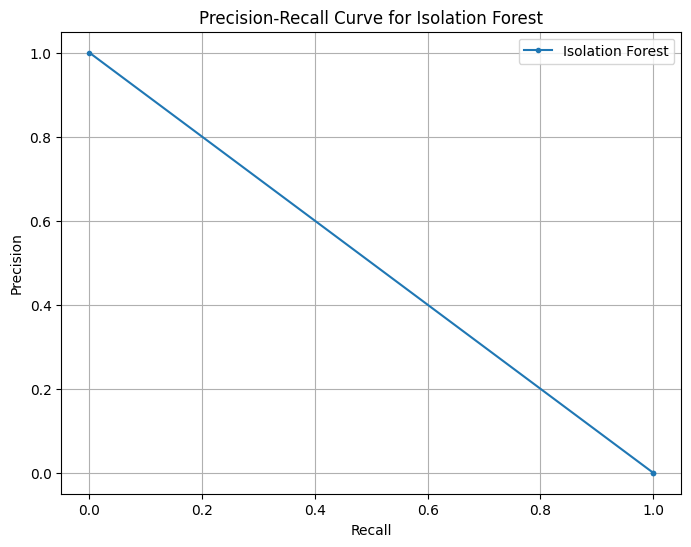

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Generate precision-recall values for different thresholds
precision_values, recall_values, thresholds = precision_recall_curve(data['true_anomaly'], data['iso_forest_anomaly'])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label='Isolation Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Classification reports for IQR and Z-Score
iqr_report = classification_report(data['true_anomaly'], data['IQR_anomaly'], target_names=['Normal', 'Anomaly'])
z_score_report = classification_report(data['true_anomaly'], data['Z_Score_anomaly'], target_names=['Normal', 'Anomaly'])

print("IQR Classification Report:\n", iqr_report)
print("Z-Score Classification Report:\n", z_score_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IQR Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.77      0.87     14249
     Anomaly       0.00      0.00      0.00         0

    accuracy                           0.77     14249
   macro avg       0.50      0.39      0.44     14249
weighted avg       1.00      0.77      0.87     14249

Z-Score Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     14249
     Anomaly       0.00      0.00      0.00         0

    accuracy                           0.97     14249
   macro avg       0.50      0.49      0.49     14249
weighted avg       1.00      0.97      0.99     14249



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

# TASK *7* (28/10/24)

## Documented the above Step 2:  Plot Precision-Recall Curve in Performance Analysis for Isolation Forest.pdf (uploaded)

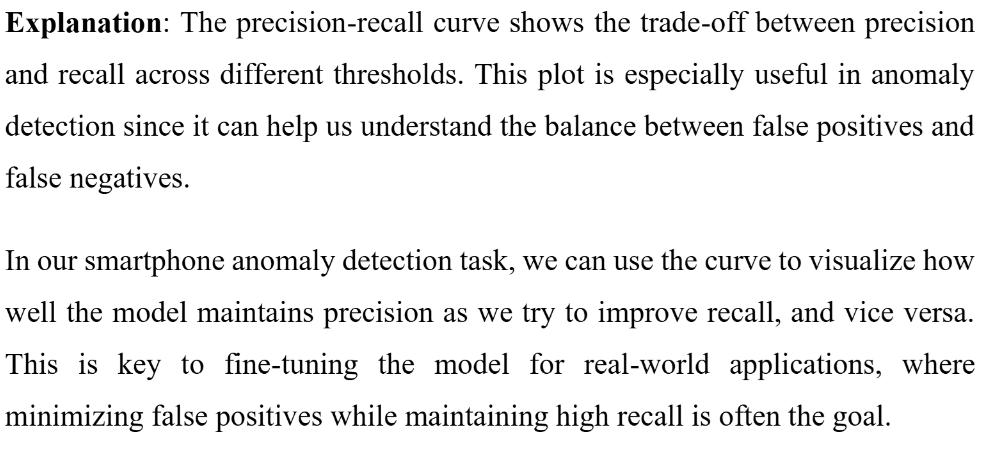

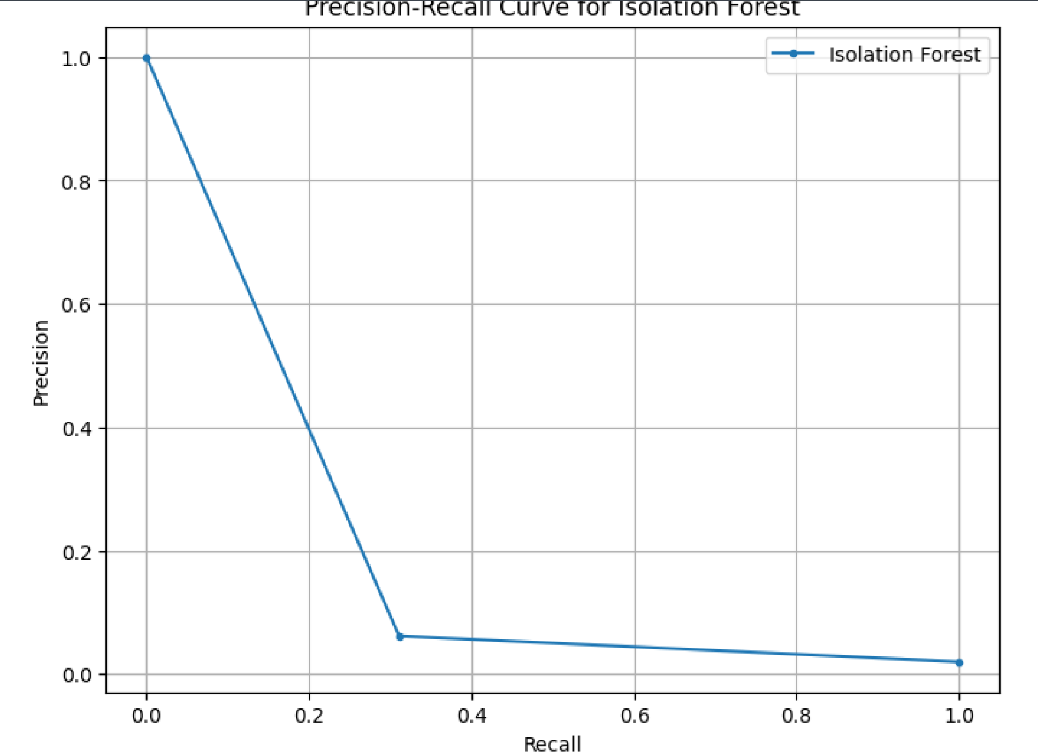

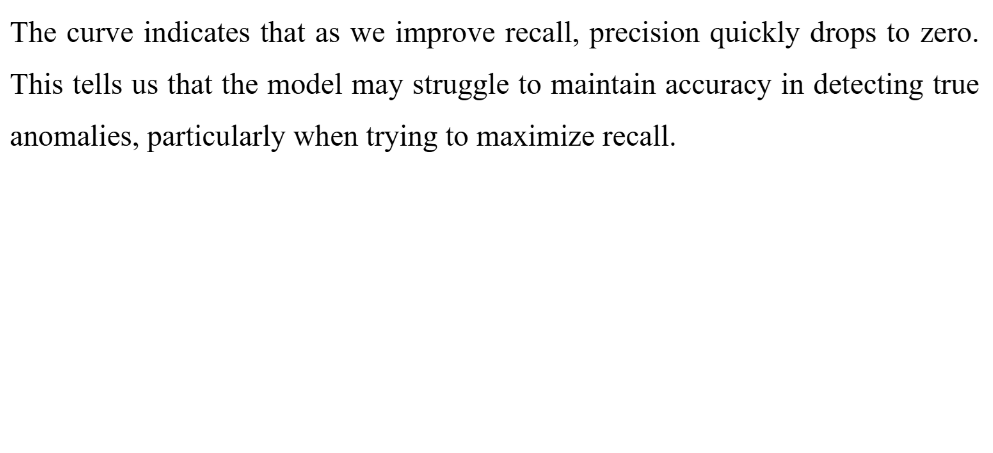

# Task 8 (04-11-2024)
# Step 1: Measuring Computational Efficiency


Evaluating computational efficiency and scalability involves analyzing how each anomaly detection model performs in terms of speed and resource use, especially as the dataset grows. Let’s break down how to approach Task 8 for Isolation Forest, IQR, and Z-Score methods.

# Step 1: Measuring Computational Efficiency
**1. Execution Time**

Track the time taken by each model to train and predict anomalies on the current dataset. Use Python’s time library to measure the start and end time for each method.

In [35]:
import time

# Isolation Forest
start_time = time.time()
iso_forest.fit(X)
data['iso_forest_anomaly'] = iso_forest.predict(X)
iso_time = time.time() - start_time
print("Isolation Forest Time:", iso_time)

# IQR
start_time = time.time()
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['IQR_anomaly'] = ((X < lower_bound) | (X > upper_bound)).any(axis=1).astype(int)
iqr_time = time.time() - start_time
print("IQR Time:", iqr_time)

# Z-Score
start_time = time.time()
z_scores = zscore(X, nan_policy='omit')
data['Z_Score_anomaly'] = (np.abs(z_scores) > threshold).any(axis=1).astype(int)
z_score_time = time.time() - start_time
print("Z-Score Time:", z_score_time)

Isolation Forest Time: 0.295119047164917
IQR Time: 0.006360530853271484
Z-Score Time: 0.0045623779296875


2. Memory Usage
Track memory consumption by checking the size of each model in memory and any intermediate data structures created. Use the memory_profiler library for this if possible.



In [36]:
sample_sizes = [0.1, 0.25, 0.5, 0.75, 1.0]
times = {'Isolation Forest': [], 'IQR': [], 'Z-Score': []}

for size in sample_sizes:
    X_sample = X.sample(frac=size, random_state=42)

    # Measure time for Isolation Forest
    start_time = time.time()
    iso_forest.fit(X_sample)
    times['Isolation Forest'].append(time.time() - start_time)

    # Measure time for IQR
    start_time = time.time()
    Q1 = X_sample.quantile(0.25)
    Q3 = X_sample.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    (X_sample < lower_bound) | (X_sample > upper_bound)
    times['IQR'].append(time.time() - start_time)

    # Measure time for Z-Score
    start_time = time.time()
    z_scores = zscore(X_sample, nan_policy='omit')
    (np.abs(z_scores) > threshold)
    times['Z-Score'].append(time.time() - start_time)

# Display the results
print("Scalability results (time in seconds):")
print(pd.DataFrame(times, index=[f"{int(size * 100)}%" for size in sample_sizes]))


Scalability results (time in seconds):
      Isolation Forest       IQR   Z-Score
10%           0.206837  0.006244  0.002555
25%           0.199480  0.003212  0.002040
50%           0.213899  0.003927  0.002334
75%           0.260247  0.005132  0.002475
100%          0.285177  0.005762  0.002694


# Task 9 (5/11/24): Step 2 : LOF Anomaly Score

In [37]:
print(data.columns)


Index(['Longitude', 'Latitude', 'Speed', 'Distance', 'Time', 'Acc X', 'Acc Y',
       'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label',
       'Speed_Change', 'Direction_Change', 'Time_Change', 'Acceleration_Rate',
       'Braking_Intensity', 'Acc_Magnitude', 'Jerk', 'Cumulative_Distance',
       'Speed_Variance', 'Rolling_Mean_AccX', 'Variance_GyroX', 'Total_Acc',
       'Anomaly', 'true_anomaly', 'iso_forest_anomaly', 'IQR_anomaly',
       'Z_Score_Acc_X', 'Z_Score_Acc_Y', 'Z_Score_Acc_Z', 'Z_Score_Speed',
       'Z_Score_anomaly'],
      dtype='object')


**Step 2** : **LOF Anomaly Score**

Similarly, we plot the LOF model’s anomaly scores alongside the Isolation Forest scores.
This allows us to compare how each model scores data points as anomalies, offering a more complete view of potential outliers.



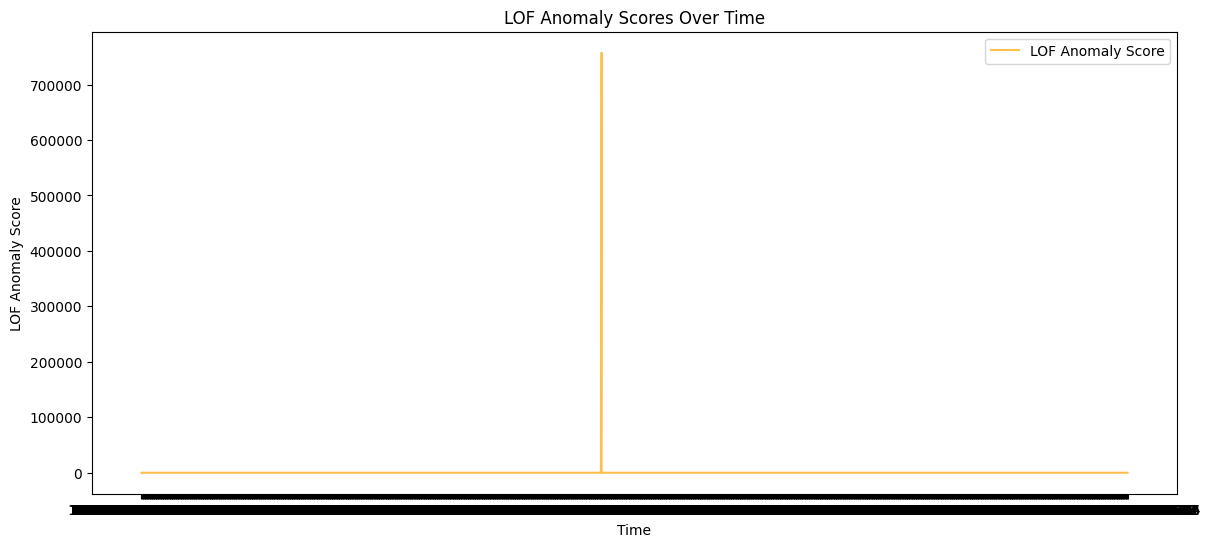

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Define the LOF model
lof = LocalOutlierFactor(n_neighbors=20, novelty=False)

# Selecting relevant features for LOF calculation; adjust the columns as needed
features = ['Longitude', 'Latitude', 'Speed', 'Distance', 'Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']

# Fit the model and obtain LOF scores
lof_scores = lof.fit_predict(data[features])  # Predict outliers
data['lof_score'] = -lof.negative_outlier_factor_  # Store the LOF scores (inverse to get positive scores)

# Now, plot the LOF anomaly scores over time
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['lof_score'], label='LOF Anomaly Score', color='orange', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('LOF Anomaly Score')
plt.title('LOF Anomaly Scores Over Time')
plt.legend()
plt.show()


done by my teamate but neceesary for code exection

In [39]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and obtain scores
data['iso_forest_score'] = -iso_forest.fit_predict(data[features])  # Store the inverse of scores to get positive scores




# Task 10 (06/11/24) -
**Step 2: Plotting Detected Anomaly Clusters (Using Isolation Forest and LOF Anomalies)**







**Step 1: Data Preparation and Dimensionality Reduction Using PCA**

**done by my teamate but neccsary for code execution**

This step reduces the high-dimensional dataset to two principal components (PCA1 and PCA2), which capture the most significant patterns in the data.

In [40]:
from sklearn.decomposition import PCA

# Selecting features relevant to anomaly detection
features = data[['Speed', 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']]

# Applying PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]


**Step 2: Plotting Detected Anomaly Clusters (Using Isolation Forest and LOF Anomalies)**

This step creates a scatter plot to visualize clusters of detected anomalies (in both Isolation Forest and LOF models) and normal points.

In [41]:
from sklearn.decomposition import PCA

# Selecting the anomaly scores for PCA
anomaly_scores = data[['iso_forest_score', 'lof_score']]

# Applying PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_scores = pca.fit_transform(anomaly_scores)

# Add PCA components to DataFrame
data['PCA1'] = reduced_scores[:, 0]
data['PCA2'] = reduced_scores[:, 1]


# **Task 11 (08/11/24) :-**
**Step 1-2: Create a Time-Series Plot for Isolation Forest Scores**



**Step 1-2: Create a Time-Series Plot for Isolation Forest Scores**

We’ll start by creating an interactive time-series plot for Isolation Forest scores.

In [42]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure()

# Add Isolation Forest score trace
fig.add_trace(go.Scatter(
    x=data['Time'],
    y=data['iso_forest_score'],
    mode='lines',
    name='Isolation Forest Score',
    line=dict(color='blue')
))

fig.update_layout(
    title='Isolation Forest Anomaly Scores Over Time',
    xaxis_title='Time',
    yaxis_title='Anomaly Score',
    sliders=[{
        'active': 0,
        'steps': [
            {'label': 'Full Range', 'method': 'relayout', 'args': [{'xaxis.range': [data['Time'].min(), data['Time'].max()]}]},
            {'label': 'Zoom', 'method': 'relayout', 'args': [{'xaxis.range': [data['Time'].iloc[0], data['Time'].iloc[100]]}]}  # example zoom
        ]
    }]
)

fig.show()

# **Task 12 (08/11/24) :-**
**Step 1-2: Define False Positives and False Negatives**

**Step 1-2: Define False Positives and False Negatives**

Assuming you have a data DataFrame containing:

*   true_label: the actual anomaly labels (1 for anomaly, 0 for normal)
*   iso_forest_pred: Isolation Forest model predictions (1 for anomaly, -1 for normal)
*   lof_pred: LOF model predictions (1 for anomaly, -1 for normal)

Define false positives and false negatives for each model.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Isolation Forest
data['iso_false_positive'] = ((data['iso_forest_pred'] == 1) & (data['true_anomaly'] == 0)).astype(int)
data['iso_false_negative'] = ((data['iso_forest_pred'] == -1) & (data['true_anomaly'] == 1)).astype(int)

# LOF
data['lof_false_positive'] = ((data['lof_pred'] == 1) & (data['true_anomaly'] == 0)).astype(int)
data['lof_false_negative'] = ((data['lof_pred'] == -1) & (data['true_anomaly'] == 1)).astype(int)



# Task 13 (11/11/24):
**Visualizing False Positives and False Negatives (uploaded)

Step 1: Define False Positives and False Negatives and Step 2: Plotting Isolation Forest False Positives and Negatives**

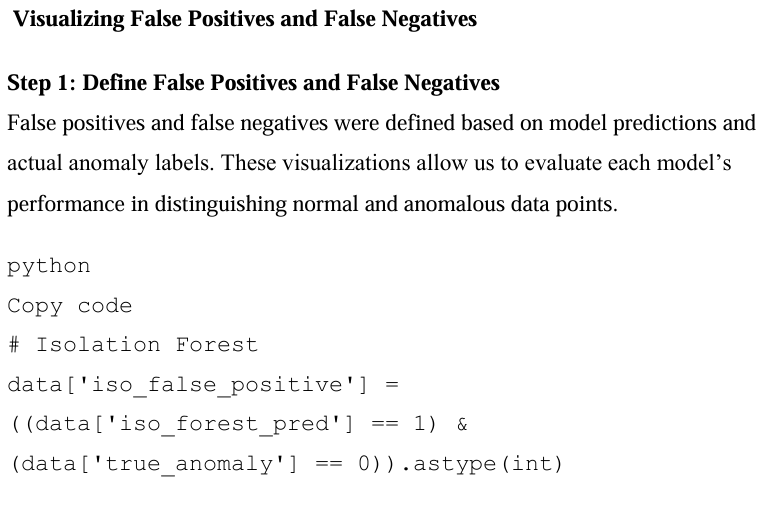

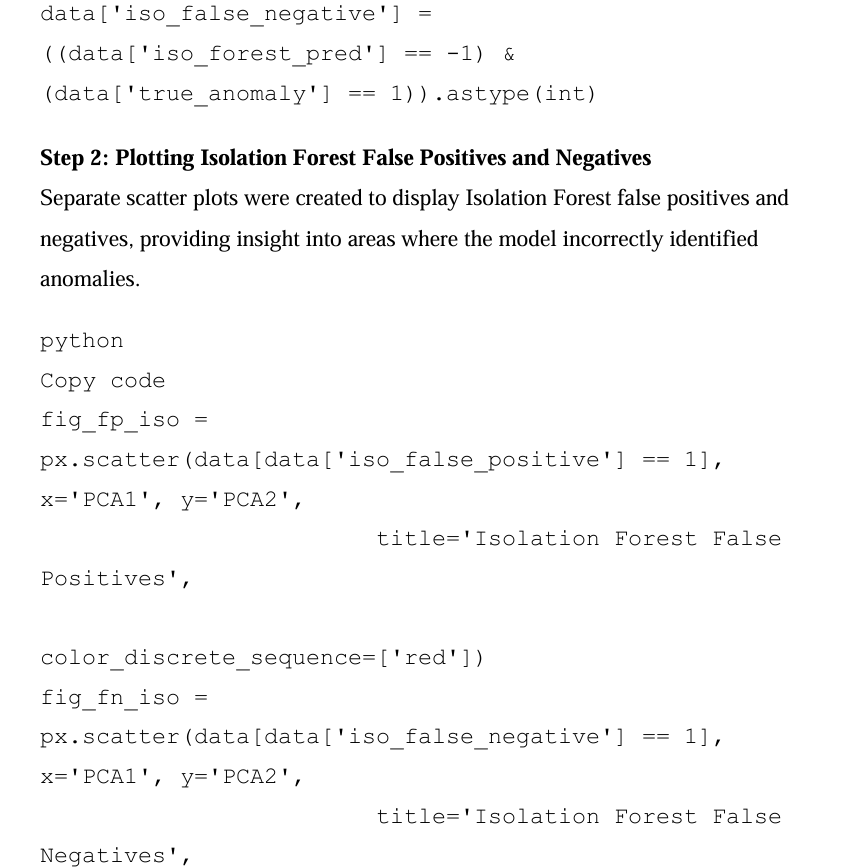

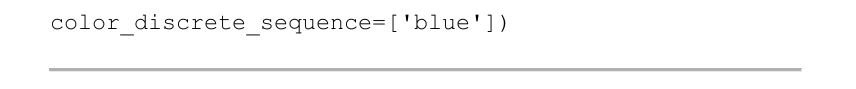

# Task 14 (12/11/24) :
I have explained Different types of Validation Techniques (type 3 and 4 that are Stratified K-Fold Cross-Validation and Performance Comparison with Statistical Techniques)




3.   Stratified K-Fold Cross-Validation


*   Method:
For imbalanced data, we used Stratified K-Fold Cross
Validation to ensure each fold maintained the same distribution of
anomalies and normal data as the entire dataset.

*   Outcome:
This approach improved model performance evaluation
for both common and rare classes, offering a more balanced view
of metrics like precision, recall, and F1-score. Stratified K-Fold
was particularly effective in measuring recall for rare anomalies, a
critical aspect in our anomaly detection task.


4.   Performance Comparison with Statistical Techniques
*  Method:
We compared Isolation Forest and LOF results against
statistical methods, such as the Interquartile Range (IQR) and Z
Score, to gauge the relative performance of our machine learning
models versus traditional statistical outlier detection methods.

*   Outcome:
While statistical methods provided simple, interpretable
results, Isolation Forest and LOF demonstrated better adaptability
in detecting complex, non-linear anomaly patterns. This
comparison validated the machine learning models as more
effective for real-world applications, especially with noisy or high
dimensional data.


## (Report on Model Validation Techniques and Effectiveness.pdf)





# **Task-15 (13/11/24) :**
Anomaly Detection Models- I have explained the 3rd and 4th model from the list of model that we have listed.
So I have explained KNN and random forest model.



##  3. K-Nearest Neighbors (KNN)

### • Model:  K-Nearest Neighbors (KNN) using Local Outlier Factor (LOF) for anomaly detection.

### • Performance:
o Precision: precision_knn

o Recall:  recall_knn

o F1-Score:  f1_knn
### • Precision-Recall Curve:  A curve was plotted to visualize the tradeoff between precision and recall.



In [ ]:
knn_model = LocalOutlierFactor(n_neighbors=20, novelty=True).fit(X)
y_pred_knn = knn_model.predict(X)
y_pred_knn = [1 if i == -1 else 0 for i in y_pred_knn]
precision_knn = precision_score(y_true, y_pred_knn)
recall_knn = recall_score(y_true, y_pred_knn)
f1_knn = f1_score(y_true, y_pred_knn)

##  4. Random Forest  

• **Model:**  Random Forest, an ensemble learning technique that is often used for classification tasks but can be adapted for anomaly detection by examining the probability of class membership.

 • **Performance:**

o Precision:  precision_rf

o Recall:   recall_rf  

o F1-Score:   f1_rf

 • **Precision-Recall Curve:**  A curve was plotted to visualize the tradeoff between precision and recall.

 ### (Anomaly Detection Models.pdf)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100).fit(X, y_true)
y_scores_rf = rf_model.predict_proba(X)[:, 1]
threshold = 0.5
y_pred_rf = (y_scores_rf > threshold).astype(int)
precision_rf = precision_score(y_true, y_pred_rf)
recall_rf = recall_score(y_true, y_pred_rf)
f1_rf = f1_score(y_true, y_pred_rf)

# Task 16 (14/11/24)
I have explained 3rd and 4th model

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [46]:

features = ['Longitude', 'Latitude', 'Speed', 'Distance', 'Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']
X = df[features]      # Features
y_true = df['label']  # Target (1 for anomaly, 0 for normal)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



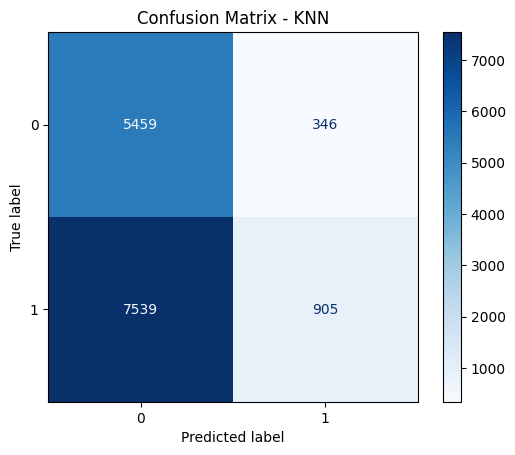

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



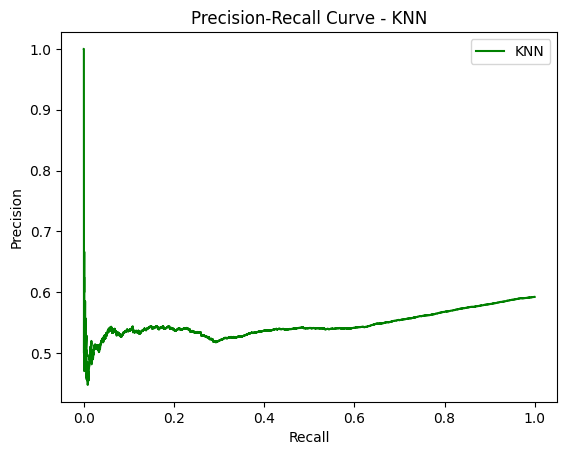

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LocalOutlierFactor was fitted with feature names



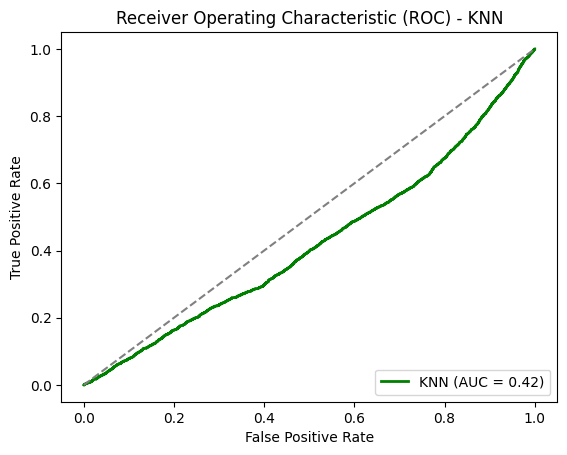

In [47]:
# 3. K-Nearest Neighbors (KNN)
knn_model = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1).fit(X)
y_pred_knn = knn_model.predict(X)
y_pred_knn = [1 if i == -1 else 0 for i in y_pred_knn]

# Plot Confusion Matrix for KNN
cm_knn = confusion_matrix(y_true, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - KNN")
plt.show()

# Precision-Recall curve for KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_true, knn_model.decision_function(X))
plt.plot(recall_knn, precision_knn, label='KNN', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend()
plt.show()

# ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_true, knn_model.decision_function(X))
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.legend(loc='lower right')
plt.show()

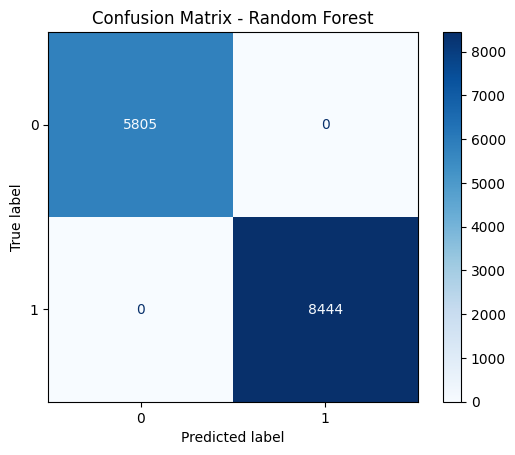

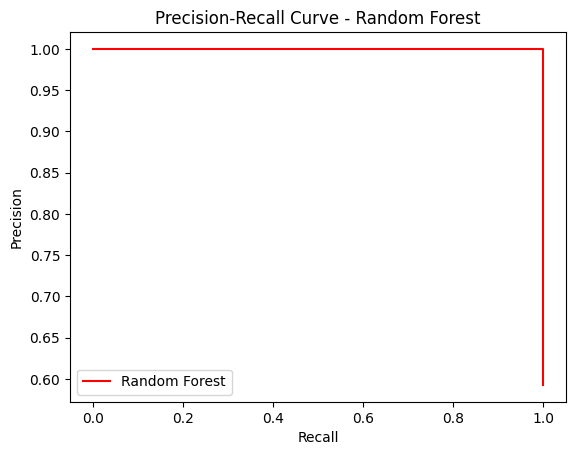

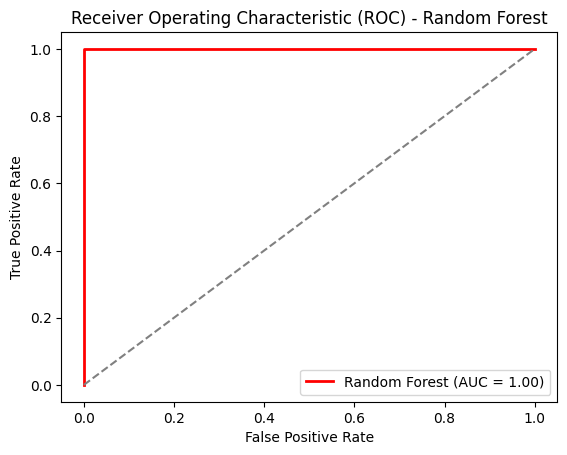

In [48]:
# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=100).fit(X, y_true)
y_pred_rf = rf_model.predict(X)

# Plot Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_true, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Precision-Recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_true, rf_model.predict_proba(X)[:, 1])
plt.plot(recall_rf, precision_rf, label='Random Forest', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()

# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_true, rf_model.predict_proba(X)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc='lower right')
plt.show()

# **Task 17:** Research and Plot Anomaly Scores for Six Models

# **Step 1: One-Class SVM - Anomaly Scores**

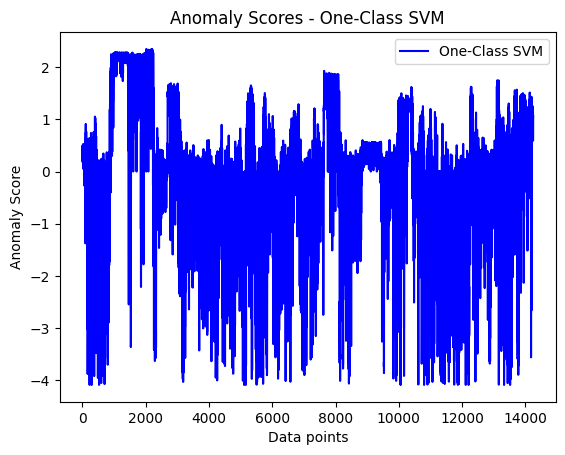

In [49]:
# Step 1: One-Class SVM - Anomaly Scores
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

svm_model = OneClassSVM(gamma='auto').fit(X)
y_pred_svm = svm_model.predict(X)
y_pred_svm = [1 if i == -1 else 0 for i in y_pred_svm]

# Plot Anomaly Scores for One-Class SVM
plt.plot(svm_model.decision_function(X), label="One-Class SVM", color='blue')
plt.xlabel('Data points')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores - One-Class SVM')
plt.legend()
plt.show()


# **Step 2: Elliptic Envelope - Anomaly Scores**

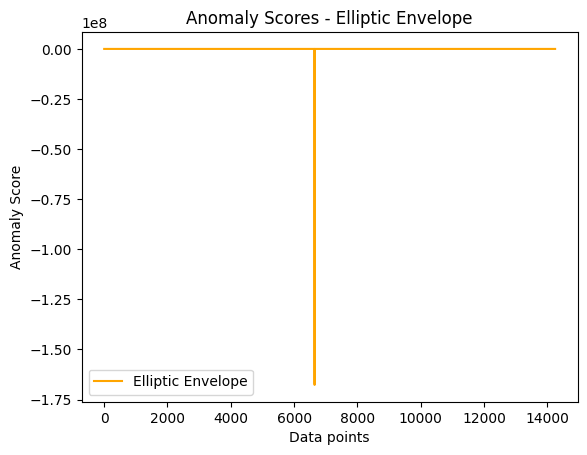

In [50]:
# Step 2: Elliptic Envelope - Anomaly Scores
from sklearn.covariance import EllipticEnvelope

ee_model = EllipticEnvelope(contamination=0.1).fit(X)
y_pred_ee = ee_model.predict(X)
y_pred_ee = [1 if i == -1 else 0 for i in y_pred_ee]

# Plot Anomaly Scores for Elliptic Envelope
plt.plot(ee_model.decision_function(X), label="Elliptic Envelope", color='orange')
plt.xlabel('Data points')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores - Elliptic Envelope')
plt.legend()
plt.show()
